# Pyspark: For Data Analysis

In [1]:
import findspark
import pyspark
findspark.init()
from pyspark.sql import SparkSession

In [2]:
## merge the last 7 years
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df_2017 = spark.read.csv("2017-18.csv", header=True, inferSchema=True)
df_2018 = spark.read.csv("2018-19.csv", header=True, inferSchema=True) 
df_2019 = spark.read.csv("2019-20.csv", header=True, inferSchema=True)
df_2020 = spark.read.csv("2020-21.csv", header=True, inferSchema=True)
df_2021 = spark.read.csv("2021-22.csv", header=True, inferSchema=True)
df_2022 = spark.read.csv("2022-23.csv", header=True, inferSchema=True)
df_2023 = spark.read.csv("2023-24.csv", header=True, inferSchema=True)

24/01/15 21:42:02 WARN Utils: Your hostname, Olamides-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.212 instead (on interface en0)
24/01/15 21:42:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/15 21:42:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df_2017.show(3)
print(df_2017.count(), "rows")
print (len(df_2017.columns), "columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2017/18|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 2|
|       2017/18|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 6|
|       2017/18|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 1|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

In [4]:
df_2020.show(3)
print(df_2020.count(), "rows")
print (len(df_2020.columns), "columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2020/21|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 5|
|       2020/21|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 4|
|       2020/21|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 2|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

In [5]:
df_2023.show(3)
print(df_2023.count(), "rows")
print (len(df_2023.columns), "columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2023/24|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 2|
|       2023/24|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 3|
|       2023/24|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 2|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

# Schema

In [6]:
df_2017.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [7]:
df_2020.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [8]:
df_2023.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [9]:
merged_df = df_2017.union(df_2018).union(df_2019).union(df_2020).union(df_2021).union(df_2022).union(df_2023)

In [10]:
merged_df

DataFrame[Financial Year: string, Financial Quarter: double, Force Name: string, Offence Description: string, Offence Group: string, Offence Subgroup: string, Offence Code: string, Number of Offences: string]

In [11]:
merged_df.show()

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2017/18|              1.0|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 2|
|       2017/18|              1.0|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 6|
|       2017/18|              1.0|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 1|
|       2017/18|              1.0|Avon and Somerset|Aggravated Burgla...|      Theft offences|Non-domestic burg.

In [12]:
merged_df.head()

Row(Financial Year='2017/18', Financial Quarter=1.0, Force Name='Avon and Somerset', Offence Description='Absconding from lawful custody', Offence Group='Miscellaneous crimes against society', Offence Subgroup='Miscellaneous crimes against society', Offence Code='80', Number of Offences='2')

# Research questions using Spark

In [13]:
spark.version

'3.5.0'

In [14]:
from pyspark.sql.functions import count
from pyspark.sql.functions import desc
from pyspark.sql import functions as spark_functions
from pyspark.sql import Window

## RQ1: Which 5 categories of crime are most prevalent in the years used for this project

In [15]:
yearly_crime_counts = merged_df.groupBy("Financial Year", "Offence Subgroup") \
                         .agg(count("Number of Offences").alias("count")) \
                         .orderBy("Financial Year", desc("count"))

In [16]:
top_5_per_year = (
    yearly_crime_counts.select("Financial Year", "Offence Subgroup", "count")
    .withColumn("rank", spark_functions.row_number().over(Window.partitionBy("Financial Year").orderBy(desc("count"))))
    .filter(spark_functions.col("rank") <= 5)  # Filter for top 5 within each year
    .orderBy("Financial Year", "rank")  # Order results by year and rank
)

In [17]:
top_5_per_year.toPandas()

,Financial Year,Offence Subgroup,count,rank
0,None,None,0,1
1,2017/18,Miscellaneous crimes against society,4224,1
2,2017/18,Other sexual offences,2816,2
3,2017/18,Domestic burglary,1760,3
4,2017/18,Violence without injury,1760,4
5,2017/18,Other theft offences,1408,5
6,2018/19,Miscellaneous crimes against society,4224,1
7,2018/19,Other sexual offences,2816,2
8,2018/19,Violence without injury,1760,3
9,2018/19,Domestic burglary,1760,4


## RQ2: Which crimes are most common in different police areas over the years 

- using the offence subgroup to determine the most common crime per the force name for each individual year used in the code


In [18]:
top_crimes_per_force_per_year = (
    merged_df.groupBy("Financial Year", "Force Name", "Offence Subgroup")  # Group by the specified columns
              .agg(spark_functions.count("Number of Offences").alias("count"))  # Aggregate counts
              .withColumn("rank", spark_functions.row_number().over(Window.partitionBy("Financial Year", "Force Name").orderBy(desc("count"))))  # Assign ranks
              .filter(spark_functions.col("rank") == 1)  # to Keep only the top-ranked crimes
              .orderBy("Financial Year", "Force Name")  # Order results for clarity
)

In [19]:
top_crimes_per_force_per_year.show()

+--------------+--------------------+--------------------+-----+----+
|Financial Year|          Force Name|    Offence Subgroup|count|rank|
+--------------+--------------------+--------------------+-----+----+
|          NULL|                NULL|                NULL|    0|   1|
|       2017/18|        Action Fraud| Fraud: action fraud|    4|   1|
|       2017/18|   Avon and Somerset|Miscellaneous cri...|   96|   1|
|       2017/18|        Bedfordshire|Miscellaneous cri...|   96|   1|
|       2017/18|British Transport...|Miscellaneous cri...|   96|   1|
|       2017/18|               CIFAS|        Fraud: CIFAS|    4|   1|
|       2017/18|      Cambridgeshire|Miscellaneous cri...|   96|   1|
|       2017/18|            Cheshire|Miscellaneous cri...|   96|   1|
|       2017/18|           Cleveland|Miscellaneous cri...|   96|   1|
|       2017/18|             Cumbria|Miscellaneous cri...|   96|   1|
|       2017/18|          Derbyshire|Miscellaneous cri...|   96|   1|
|       2017/18|  De

In [20]:
top_crimes_per_force_per_year.toPandas()

,Financial Year,Force Name,Offence Subgroup,count,rank
0,None,None,None,0,1
1,2017/18,Action Fraud,Fraud: action fraud,4,1
2,2017/18,Avon and Somerset,Miscellaneous crimes against society,96,1
3,2017/18,Bedfordshire,Miscellaneous crimes against society,96,1
4,2017/18,British Transport Police,Miscellaneous crimes against society,96,1
...,...,...,...,...,...
326,2023/24,Warwickshire,Miscellaneous crimes against society,24,1
327,2023/24,West Mercia,Miscellaneous crimes against society,24,1
328,2023/24,West Midlands,Miscellaneous crimes against society,24,1
329,2023/24,West Yorkshire,Miscellaneous crimes against society,24,1


- This code effectively identifies the crime types that are most common within different force areas for each financial year, enabling you to compare crime trends across different regions and time periods. we can determine that Miscellaneous crimes are very common among most forces 

# saving merged file to local file

# Python 

# Data Analysis, EDA & Machine Learning

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
crime_df = merged_df.toPandas()

In [23]:
crime_df

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2017/18,1.0,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,2
1,2017/18,1.0,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,6
2,2017/18,1.0,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,1
3,2017/18,1.0,Avon and Somerset,Aggravated Burglary Business and Community,Theft offences,Non-domestic burglary,31A,2
4,2017/18,1.0,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,0
...,...,...,...,...,...,...,...,...
150946,2023/24,1.0,Wiltshire,Violent disorder,Public order offences,Public order offences,62A,0
150947,2023/24,1.0,Wiltshire,Wildlife,Miscellaneous crimes against society,Miscellaneous crimes against society,96,5
150948,2023/24,1.0,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,79986
150949,2023/24,1.0,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,81062


In [24]:
crime_df.count()

Financial Year         147261
Financial Quarter      147261
Force Name             147261
Offence Description    147261
Offence Group          147261
Offence Subgroup       147261
Offence Code           147261
Number of Offences     147261
dtype: int64

In [25]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150951 entries, 0 to 150950
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Financial Year       147261 non-null  object 
 1   Financial Quarter    147261 non-null  float64
 2   Force Name           147261 non-null  object 
 3   Offence Description  147261 non-null  object 
 4   Offence Group        147261 non-null  object 
 5   Offence Subgroup     147261 non-null  object 
 6   Offence Code         147261 non-null  object 
 7   Number of Offences   147261 non-null  object 
dtypes: float64(1), object(7)
memory usage: 9.2+ MB


In [26]:
crime_df.shape

(150951, 8)

**Checking for missing values in the data**

In [27]:
crime_df.isnull().sum()

Financial Year         3690
Financial Quarter      3690
Force Name             3690
Offence Description    3690
Offence Group          3690
Offence Subgroup       3690
Offence Code           3690
Number of Offences     3690
dtype: int64

**Checking for duplicate entries in the data**

In [28]:
crime_df.duplicated().sum()

3689

**Duplicate values removal**

In [29]:
# dropping duplicate entries from the data
crime_df.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
crime_df.reset_index(drop=True,inplace=True)

In [30]:
crime_df.shape

(147262, 8)

**Let's check the statistical summary of the data.**

In [31]:
crime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Financial Quarter,147261.0,2.435003,1.135392,1.0,1.0,2.0,3.0,4.0


In [32]:
#number of unique force names
crime_df["Force Name"].nunique()

48

In [33]:
#number of unique offence groups
crime_df["Offence Group"].nunique()

10

In [34]:
#number of unique offence subgroups
crime_df["Offence Subgroup"].nunique()

30

In [35]:
crime_df["Offence Group"].mode()

0    Violence against the person
Name: Offence Group, dtype: object

In [36]:
crime_df.isnull().sum()

Financial Year         1
Financial Quarter      1
Force Name             1
Offence Description    1
Offence Group          1
Offence Subgroup       1
Offence Code           1
Number of Offences     1
dtype: int64

## Replacing commas in dataset 

In [37]:
print(crime_df['Number of Offences'].iloc[46147])  # Print the problematic value

3,002 


In [38]:
crime_df['Number of Offences'] = (crime_df['Number of Offences']
                                .str.replace(",", "")  # Remove commas
                                .str.strip())  # Remove leading/trailing spaces
crime_df['Number of Offences'] = pd.to_numeric(crime_df['Number of Offences'])

# Handling missing values 

In [39]:
# Handle missing values
# Imputation with most frequent
crime_df['Financial Quarter'] = crime_df['Financial Quarter'].fillna(crime_df['Financial Quarter'].value_counts().index[0])

In [40]:
# Imputation with median
crime_df['Number of Offences'] = crime_df['Number of Offences'].fillna(crime_df['Number of Offences'].median())  

In [41]:
crime_df.isnull().sum()

Financial Year         1
Financial Quarter      0
Force Name             1
Offence Description    1
Offence Group          1
Offence Subgroup       1
Offence Code           1
Number of Offences     0
dtype: int64

# RQ1: Which Force Name has the highest number of offences 

In [42]:
crime_df.groupby("Force Name")["Number of Offences"].sum().sort_values(ascending=False).index[0]

'Metropolitan Police'

# RQ2: Which year was the most sexual offences committed?

In [43]:
year_with_most_sexual_offences = (
    crime_df[crime_df["Offence Group"] == "Sexual offences"]  # Filter for sexual offences
    .groupby("Financial Year")["Number of Offences"]  # Group by year
    .sum()  # Count offences within each year
    .sort_values(ascending=False)  # Sort in descending order
    .index[0]  # Get the year with the highest count
)

print("Year with the most sexual offences:", year_with_most_sexual_offences)


Year with the most sexual offences: 2022/23


# RQ3: Sexual offences committed by years?

In [44]:
filtered_data = crime_df[crime_df["Offence Group"] == "Sexual offences"]
sexual_offences_by_year = filtered_data.groupby("Financial Year")["Number of Offences"].sum()
desired_years = sexual_offences_by_year.loc[["2017/18","2018/19", "2020/21", "2021/22", "2022/23", "2023/24"]] 
print(desired_years)

Financial Year
2017/18    152859.0
2018/19    164450.0
2020/21    147766.0
2021/22    193514.0
2022/23    194947.0
2023/24     48697.0
Name: Number of Offences, dtype: float64


In [45]:
# Making a list of all categorical variables
cat_cols =  ['Force Name', 'Offence Group', 'Offence Subgroup']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(crime_df[column].value_counts())
    print("-" * 50)

Force Name
Greater Manchester           3351
Avon and Somerset            3345
South Yorkshire              3345
Metropolitan Police          3345
Norfolk                      3345
North Wales                  3345
North Yorkshire              3345
Northamptonshire             3345
Northumbria                  3345
Nottinghamshire              3345
South Wales                  3345
Staffordshire                3345
London, City of              3345
Suffolk                      3345
Surrey                       3345
Sussex                       3345
Thames Valley                3345
Warwickshire                 3345
West Mercia                  3345
West Midlands                3345
West Yorkshire               3345
Wiltshire                    3345
Bedfordshire                 3345
Merseyside                   3345
Lincolnshire                 3345
Durham                       3345
British Transport Police     3345
Cambridgeshire               3345
Cheshire                     3345
Cle

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [47]:
z_scores = np.abs((crime_df['Number of Offences'] - crime_df['Number of Offences'].mean()) / crime_df['Number of Offences'].std())
iqr = crime_df['Number of Offences'].quantile(0.75) - crime_df['Number of Offences'].quantile(0.25)
upper_bound = crime_df['Number of Offences'].quantile(0.75) + 1.5 * iqr
lower_bound = crime_df['Number of Offences'].quantile(0.25) - 1.5 * iqr

In [48]:
z_scores

0          0.130704
1          0.128650
2          0.131218
3          0.130704
4          0.131731
            ...    
147257     0.131731
147258     0.129164
147259    40.942736
147260    41.495285
147261    60.399522
Name: Number of Offences, Length: 147262, dtype: float64

In [49]:
upper_bound

250.0

In [50]:
lower_bound

-150.0

In [51]:
threshold = 3

In [52]:
outliers_z = crime_df[z_scores > threshold]

In [53]:
outliers_z

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
1848,2017/18,1.0,Greater Manchester,Assault without injury,Violence against the person,Violence without injury,105A,9763.0
1925,2017/18,1.0,Greater Manchester,"Public fear, alarm or distress",Public order offences,Public order offences,9A,9319.0
2503,2017/18,1.0,Kent,Assault without injury,Violence against the person,Violence without injury,105A,6466.0
3286,2017/18,1.0,Metropolitan Police,Assault with injury,Violence against the person,Violence with injury,8N,18714.0
3289,2017/18,1.0,Metropolitan Police,Assault without injury,Violence against the person,Violence without injury,105A,17494.0
...,...,...,...,...,...,...,...,...
147036,2023/24,1.0,West Yorkshire,Harassment,Violence against the person,Stalking and harassment,8L,6447.0
147070,2023/24,1.0,West Yorkshire,"Public fear, alarm or distress",Public order offences,Public order offences,9A,8414.0
147259,2023/24,1.0,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,79986.0
147260,2023/24,1.0,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,81062.0


In [54]:
upper_limit = crime_df['Number of Offences'].quantile(0.95)  #reasonable upper limit
crime_df['Number of Offences'] = np.where(crime_df['Number of Offences'] > upper_limit, upper_limit, crime_df['Number of Offences'])

In [55]:
crime_df['Number of Offences'].head(10)

0     2.0
1     6.0
2     1.0
3     2.0
4     0.0
5     0.0
6    20.0
7    22.0
8     0.0
9    43.0
Name: Number of Offences, dtype: float64

# Data Visualisation

* univariate analysis

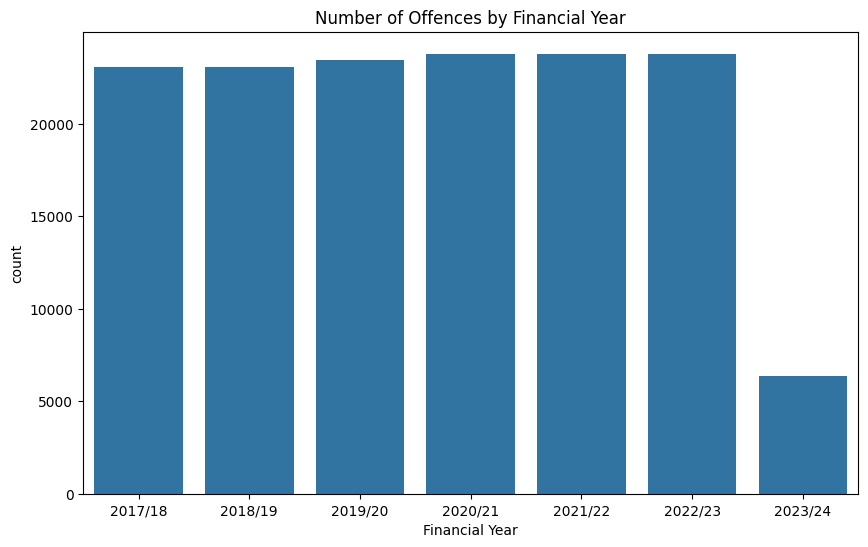

In [56]:
# Data visualization for 'financial year'
plt.figure(figsize=(10, 6))
sns.countplot(x='Financial Year', data=crime_df)
plt.title('Number of Offences by Financial Year')
plt.show()

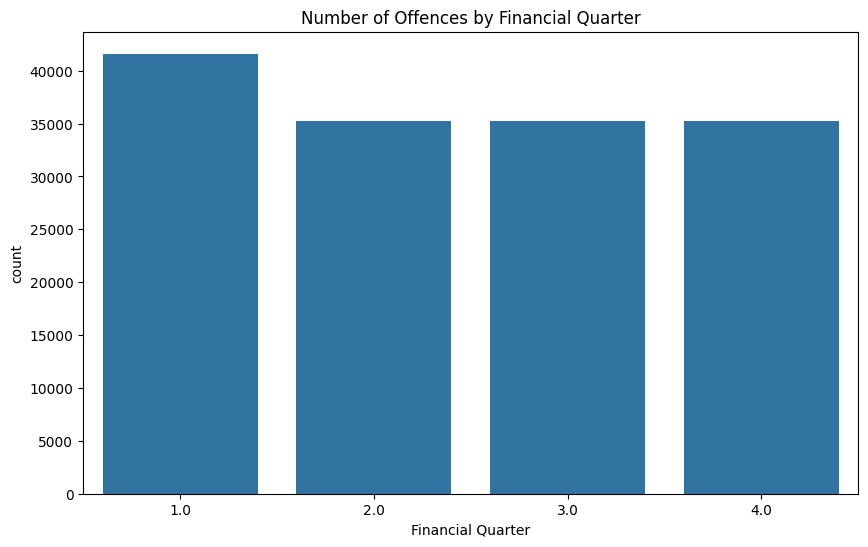

In [57]:
# Data visualization for 'financial quarter'
plt.figure(figsize=(10, 6))
sns.countplot(x='Financial Quarter', data=crime_df)
plt.title('Number of Offences by Financial Quarter')
plt.show()

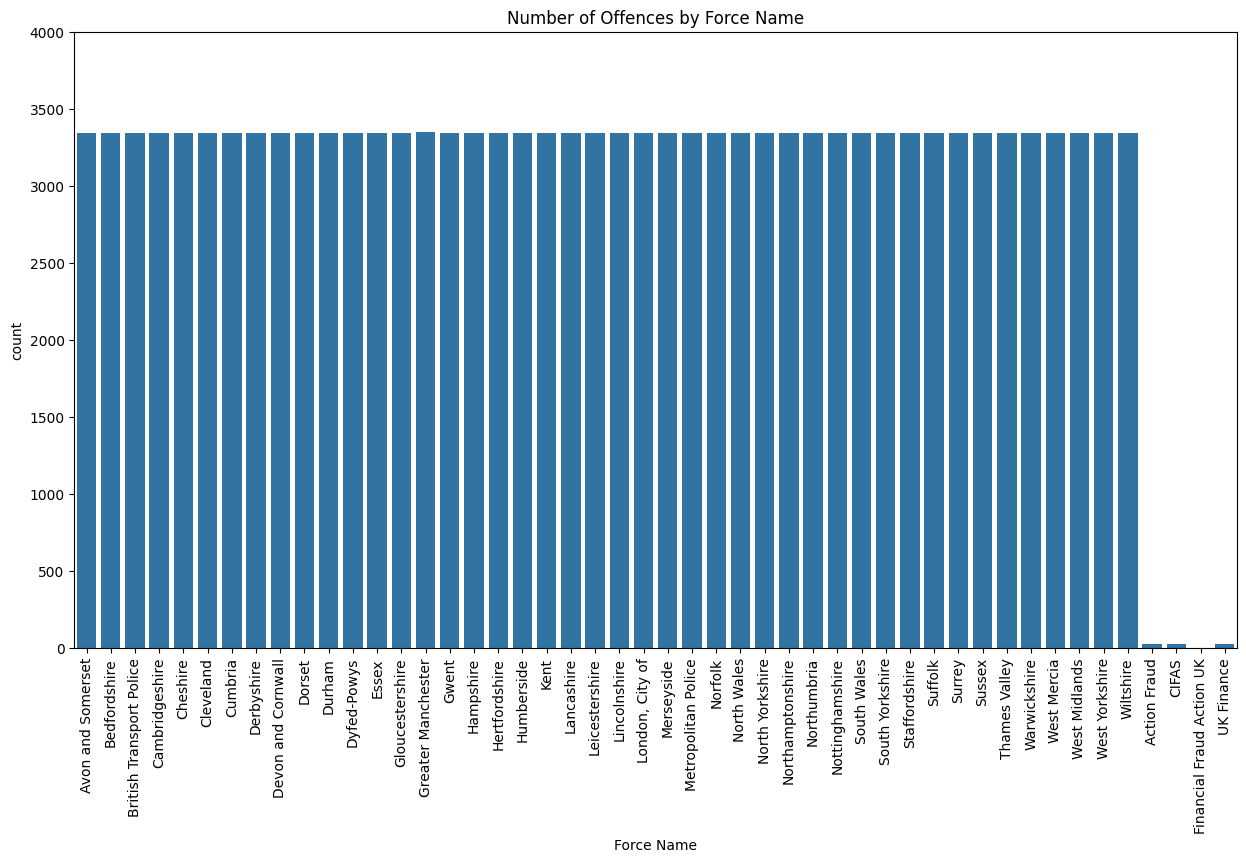

In [58]:
# Data visualization for 'force name'
plt.figure(figsize=(15, 8))
sns.countplot(x='Force Name', data=crime_df)
plt.title('Number of Offences by Force Name')
plt.xticks(rotation=90)
plt.ylim(0, 4000)
plt.show()

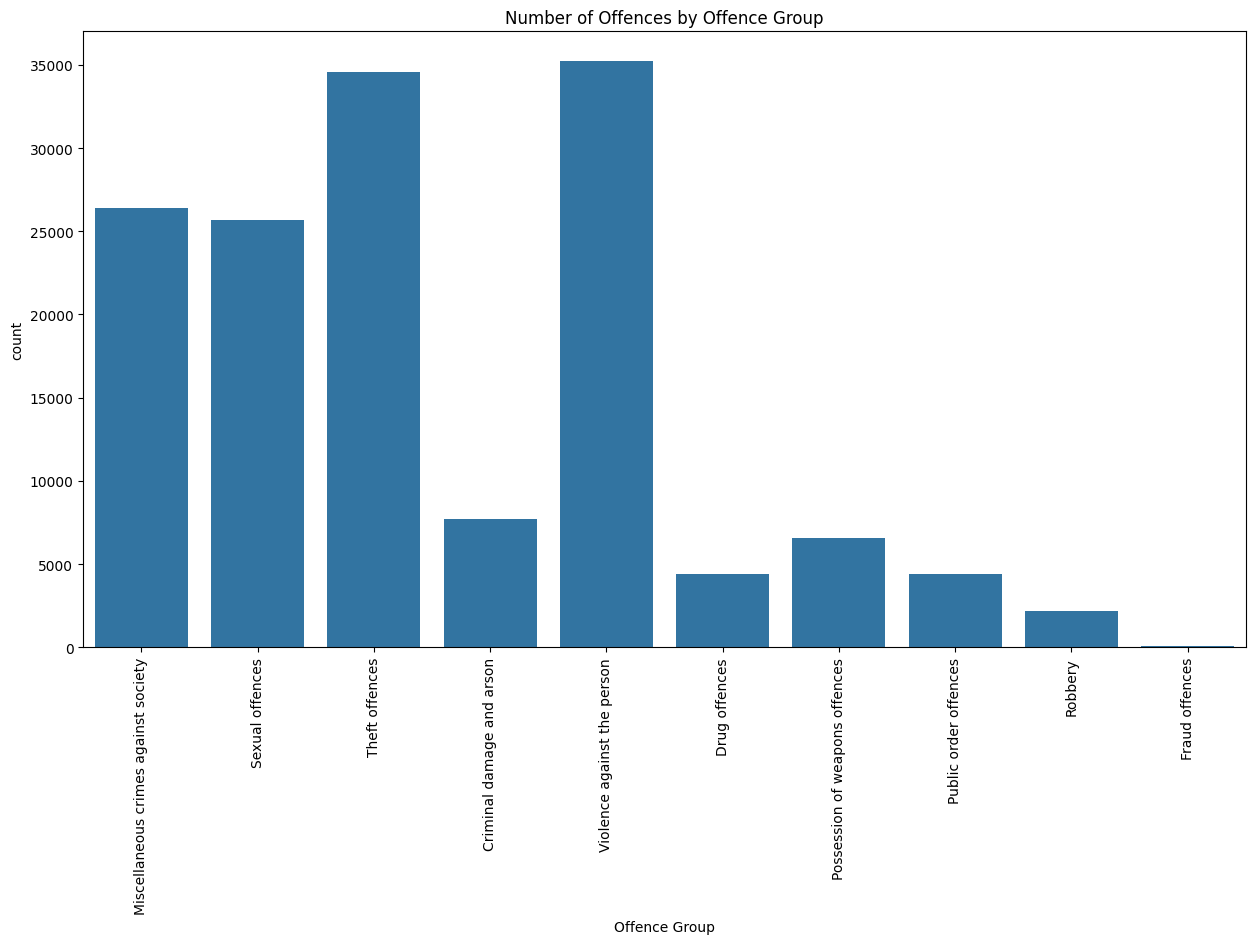

In [59]:
# Data visualization for 'offence group'
plt.figure(figsize=(15, 8))
sns.countplot(x='Offence Group', data=crime_df)
plt.title('Number of Offences by Offence Group')
plt.xticks(rotation=90)
plt.show()

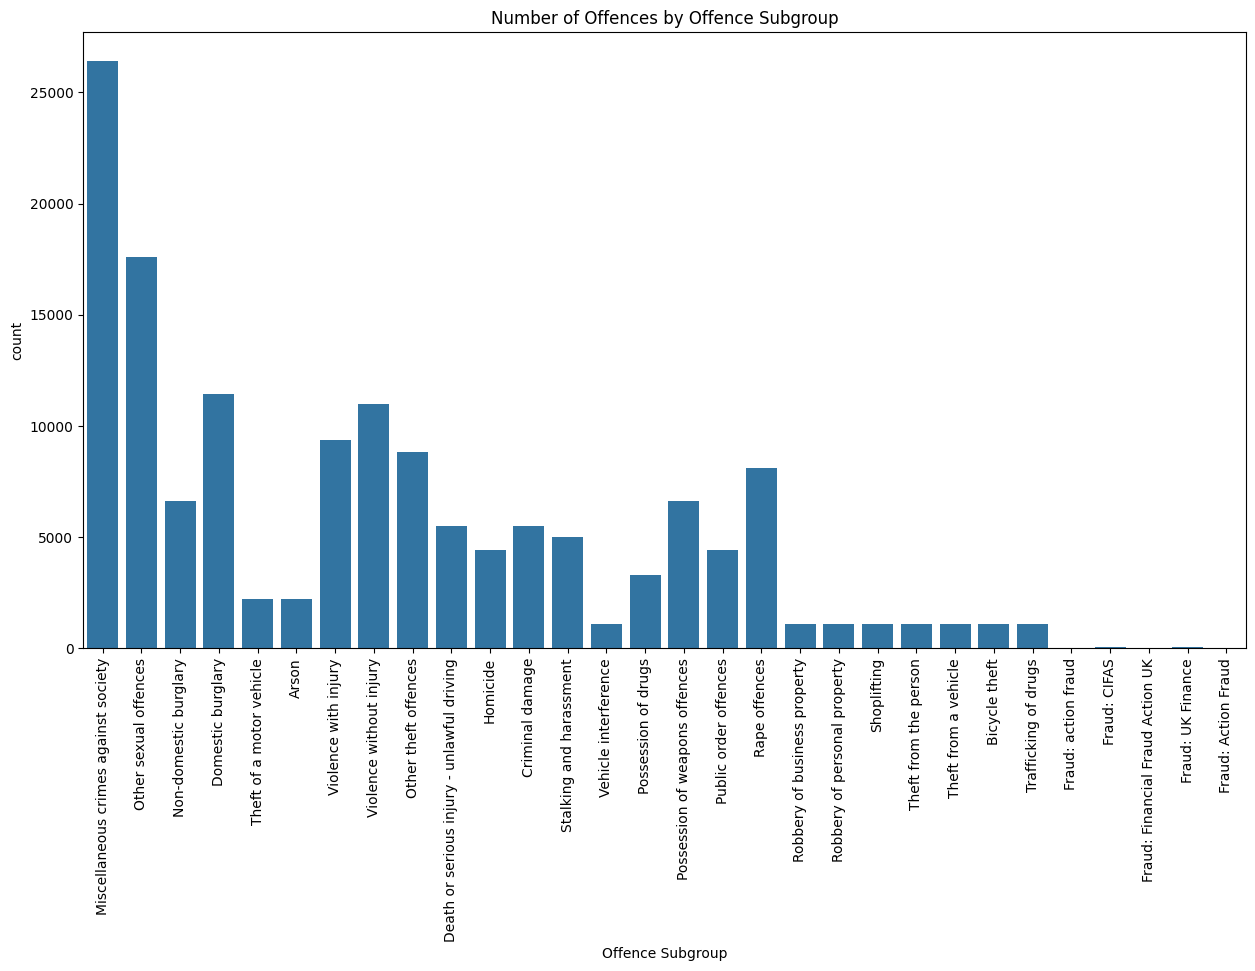

In [60]:
# Data visualization for 'offence subgroup'
plt.figure(figsize=(15, 8))
sns.countplot(x='Offence Subgroup', data=crime_df)
plt.title('Number of Offences by Offence Subgroup')
plt.xticks(rotation=90)
plt.show()

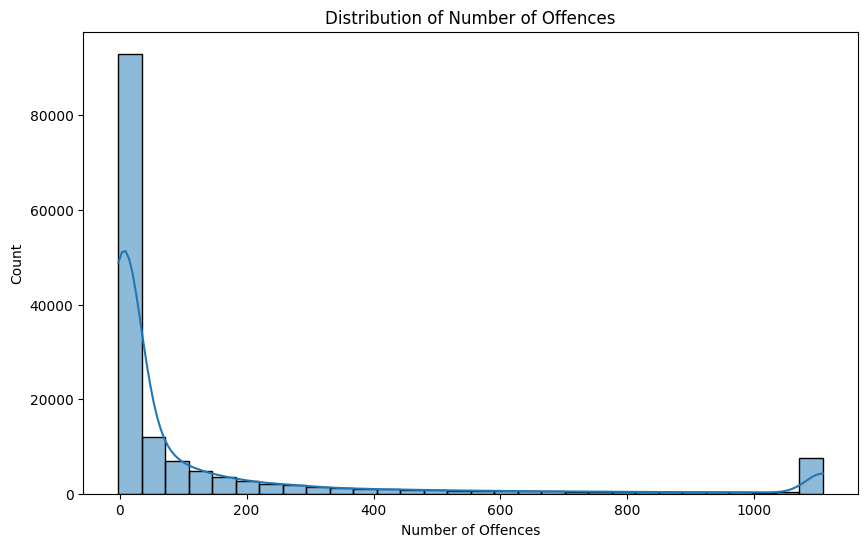

In [61]:
# Data visualization for 'number of offences'
plt.figure(figsize=(10, 6))
sns.histplot(crime_df['Number of Offences'], bins=30, kde=True)
plt.title('Distribution of Number of Offences')
plt.show()

* Bivariate analysis

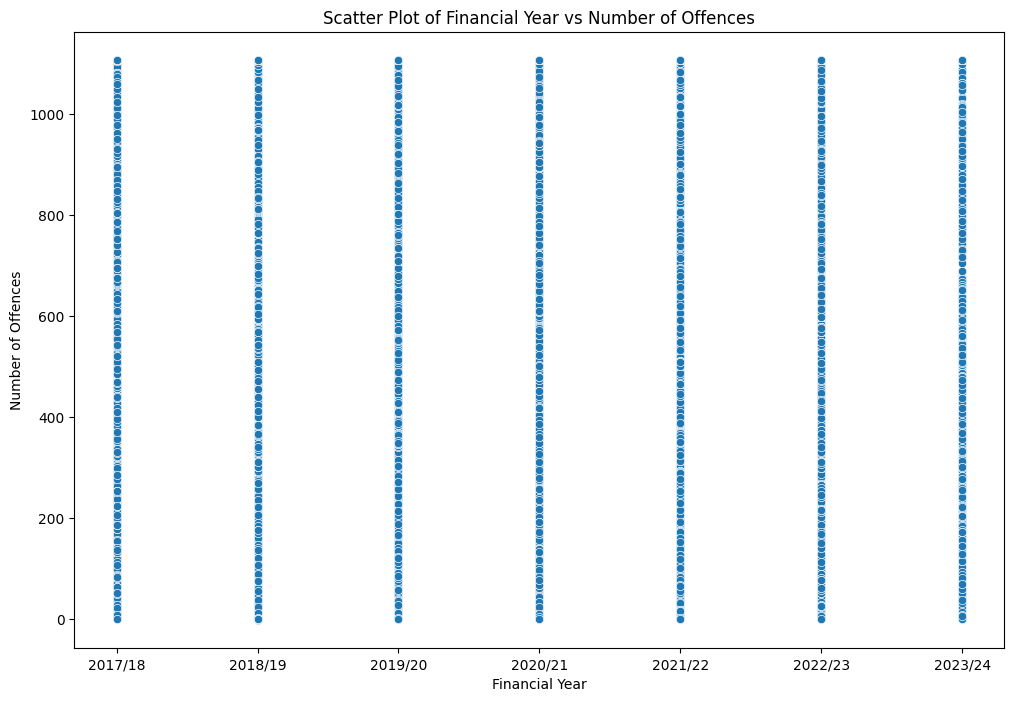

In [62]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Financial Year', y='Number of Offences', data=crime_df)
plt.title('Scatter Plot of Financial Year vs Number of Offences')
plt.show()

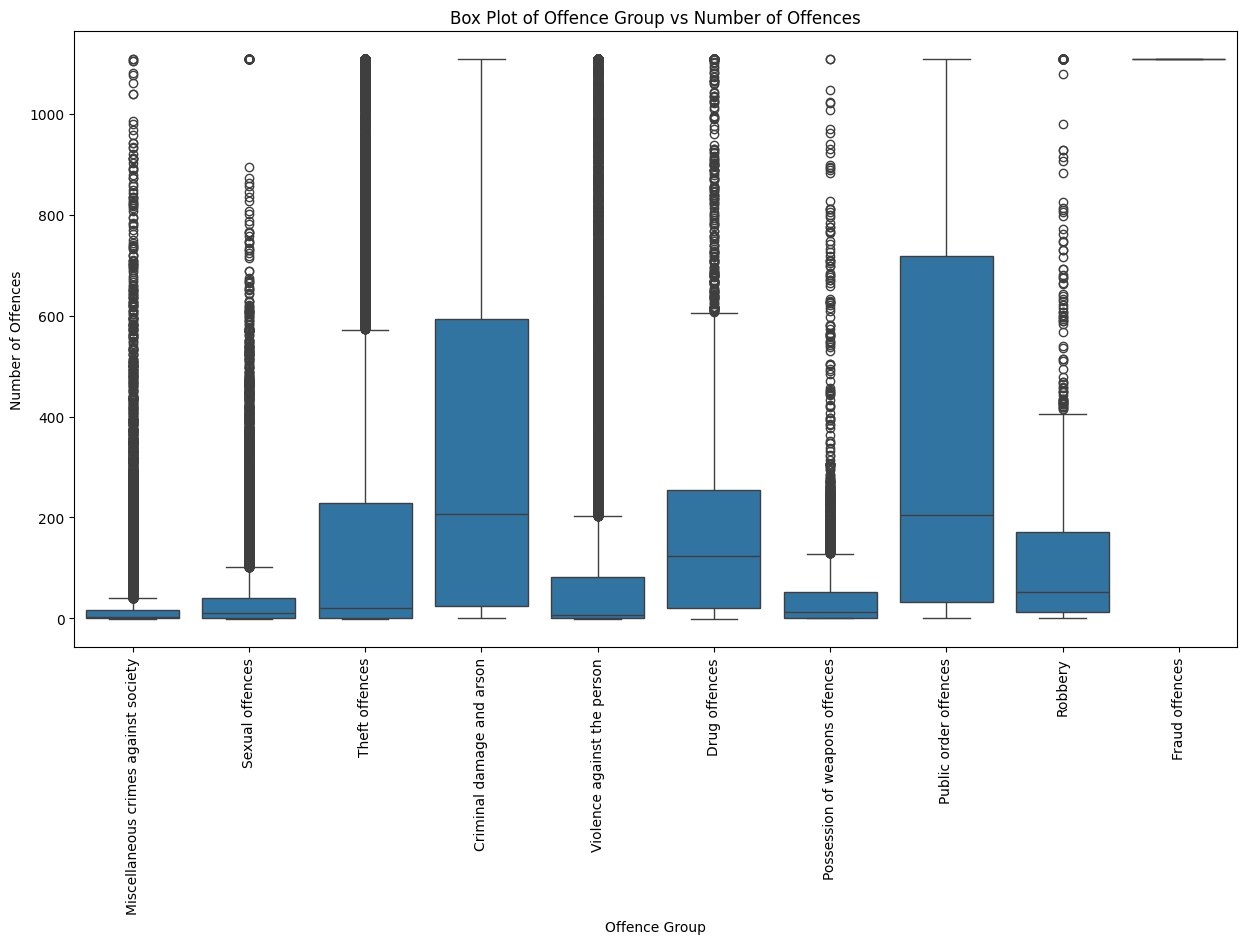

In [63]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Offence Group', y='Number of Offences', data=crime_df)
plt.title('Box Plot of Offence Group vs Number of Offences')
plt.xticks(rotation=90)
plt.show()

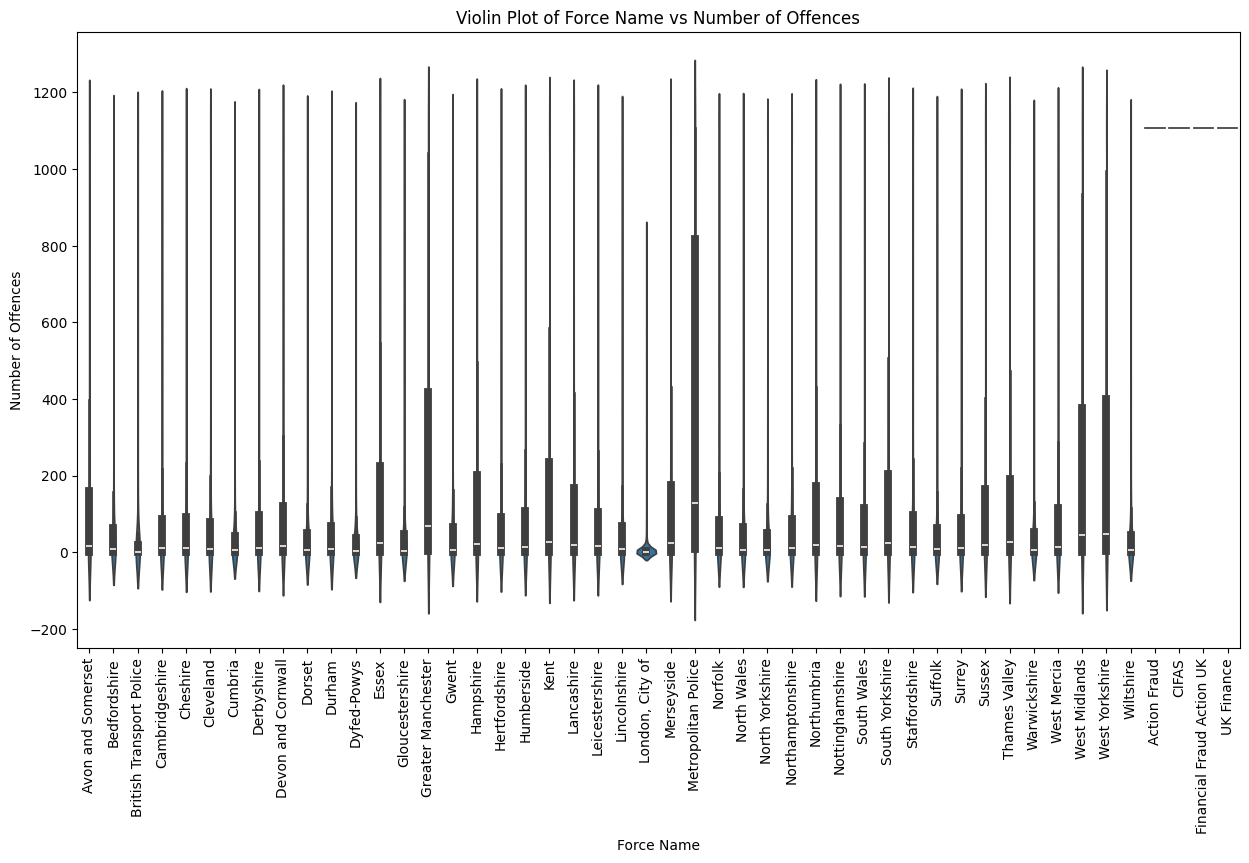

In [64]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Force Name', y='Number of Offences', data=crime_df)
plt.title('Violin Plot of Force Name vs Number of Offences')
plt.xticks(rotation=90)
plt.show()

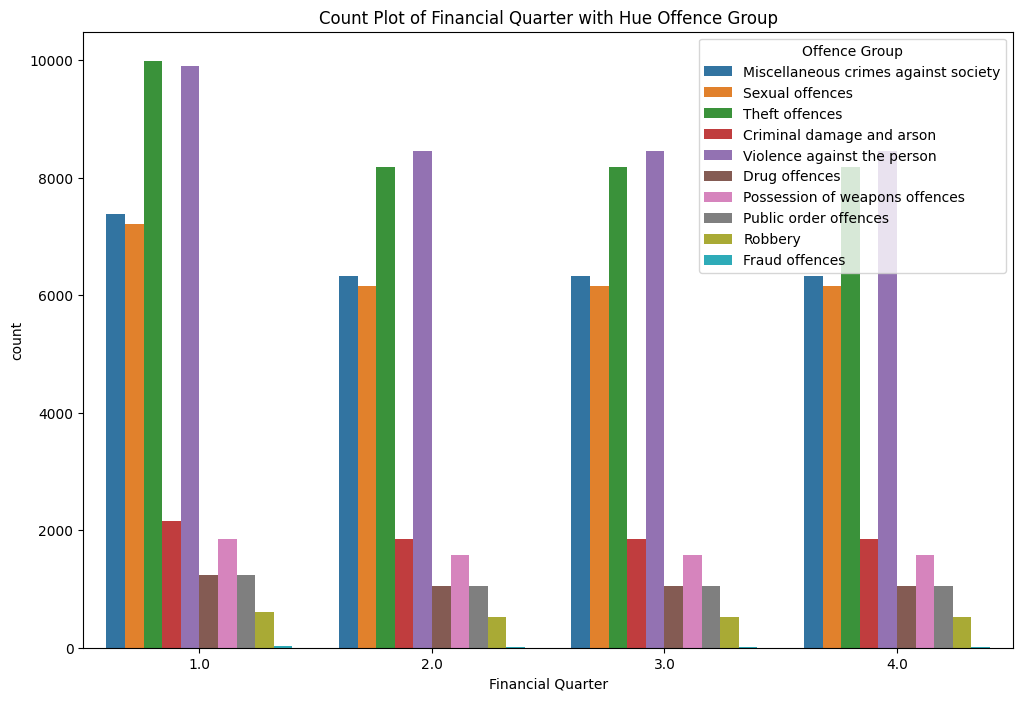

In [65]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Financial Quarter', hue='Offence Group', data=crime_df)
plt.title('Count Plot of Financial Quarter with Hue Offence Group')
plt.show()

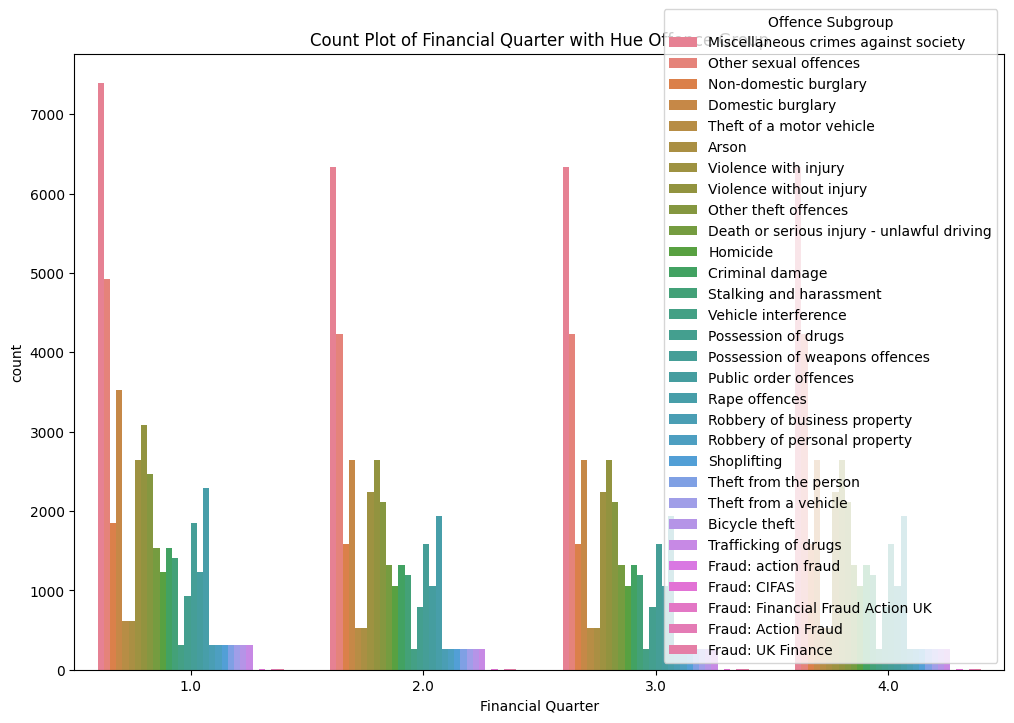

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Financial Quarter', hue='Offence Subgroup', data=crime_df)
plt.title('Count Plot of Financial Quarter with Hue Offence Group')
plt.show()

## Label encoding 

In [67]:
categorical_columns = ['Financial Year', 'Force Name', 'Offence Description', 'Offence Group',
                       'Offence Subgroup', 'Offence Code']

In [68]:
le = LabelEncoder()
for col in categorical_columns:
    crime_df[col] = le.fit_transform(crime_df[col])

In [69]:
crime_df

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,0,1.0,1,0,3,11,116,2.0
1,0,1.0,1,1,7,13,111,6.0
2,0,1.0,1,2,7,13,113,1.0
3,0,1.0,1,3,8,12,59,2.0
4,0,1.0,1,7,8,12,58,0.0
...,...,...,...,...,...,...,...,...
147257,6,1.0,47,147,5,17,106,0.0
147258,6,1.0,47,148,3,11,141,5.0
147259,6,1.0,0,64,2,5,145,1108.0
147260,6,1.0,4,65,2,6,146,1108.0


## Split Data into Features and Target

In [70]:
X = crime_df.drop("Number of Offences", axis=1)  # Features
y = crime_df['Number of Offences']  # Target variable

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
X.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code
0,0,1.0,1,0,3,11,116
1,0,1.0,1,1,7,13,111
2,0,1.0,1,2,7,13,113
3,0,1.0,1,3,8,12,59
4,0,1.0,1,7,8,12,58


In [73]:
y.head()

0    2.0
1    6.0
2    1.0
3    2.0
4    0.0
Name: Number of Offences, dtype: float64

In [74]:
X_test.isnull().sum()

Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
dtype: int64

# Support Vector Regressor

In [75]:
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

In [76]:
# SVR evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("SVR MSE:", mse_svr)
print("SVR R2:", r2_svr)
print("SVR MAE:", mae_svr)
print("SVR RMSE:", rmse_svr)

SVR MSE: 91243.52373151059
SVR R2: -0.12586256153355757
SVR MAE: 130.57624333032095
SVR RMSE: 302.0654295537816


In [77]:
y_pred_svr

array([51.77216781, -1.06850884, 22.22507794, ..., 39.03548882,
       36.26873589, 21.65714395])

In [78]:
# Checking accuracy of the model
model_svr.score(X_test, y_test)

-0.12586256153355757

# Random Forest Regressor

In [79]:
# Instantiate the model with 500 trees:
model_rf = RandomForestRegressor(n_estimators=500)

# Fit the model to the training data:
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [80]:
# Random Forest evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_svr)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest MSE: 1057.02440371382
Random Forest R2: 0.9869572748388088
Random Forest MAE: 12.376356584093871
Random Forest RMSE: 302.0654295537816


In [81]:
# Checking accuracy of the model
model_rf.score(X_test, y_test)

0.9869572748388088

# Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor 

In [83]:
model_dt = DecisionTreeRegressor() 
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [84]:
# Random Forest evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)
print("Decision Tree MAE:", mae_dt)
print("Decision Tree RMSE:", rmse_dt)

Decision Tree MSE: 1604.3791558018254
Decision Tree R2: 0.9802034122297023
Decision Tree MAE: 14.434892438070404
Decision Tree RMSE: 40.054702043603136


In [85]:
# Checking accuracy of the model
model_dt.score(X_test, y_test)

0.9802034122297023

# Model Comparison

In [86]:
# Create a DataFrame to store model results
results_df = pd.DataFrame(columns=["Model", "R2 Score", "Mean Squared Error"])

# Iterate through each model and store its performance metrics
for name, model in [("SVR", model_svr), ("Random Forest", model_rf), ("Decision Tree", model_dt)]:
    y_pred = model.predict(X_test)  # Generate predictions
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results_df = pd.concat([results_df, pd.DataFrame({"Model": name, "R2 Score": r2, "Mean Squared Error": mse}, index=[0])], ignore_index=True)
# Display the results in a clear format
print(results_df.to_string())


           Model  R2 Score  Mean Squared Error
0            SVR -0.125863        91243.523732
1  Random Forest  0.986957         1057.024404
2  Decision Tree  0.980203         1604.379156


In [87]:
Models = ['SVR', 'RF', 'DT']

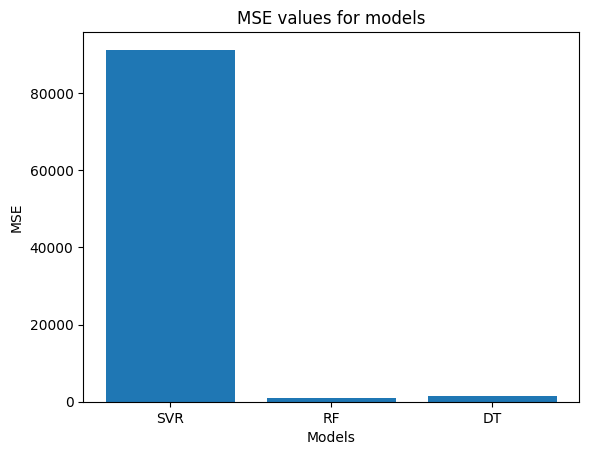

In [88]:
# Values of the MSE
MSE = [mse_svr, mse_rf, mse_dt]

# Create a bar chart
plt.bar(Models, MSE)

# Add labels and a title
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE values for models")

# Show the plot
plt.show()

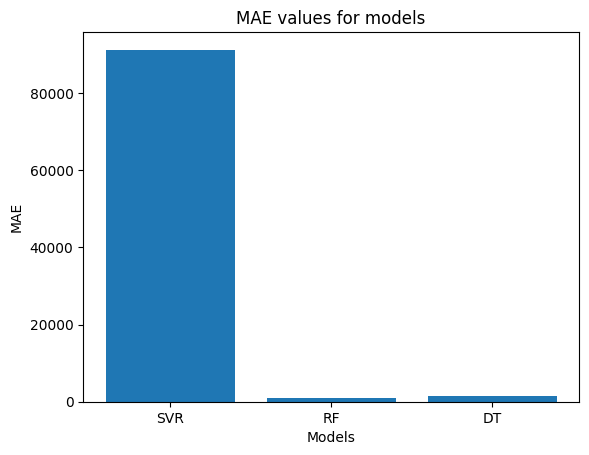

In [89]:
# Values of the MSE
MAE = [mae_svr, mae_rf, mae_dt]

# Create a bar chart
plt.bar(Models, MSE)

# Add labels and a title
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("MAE values for models")

# Show the plot
plt.show()

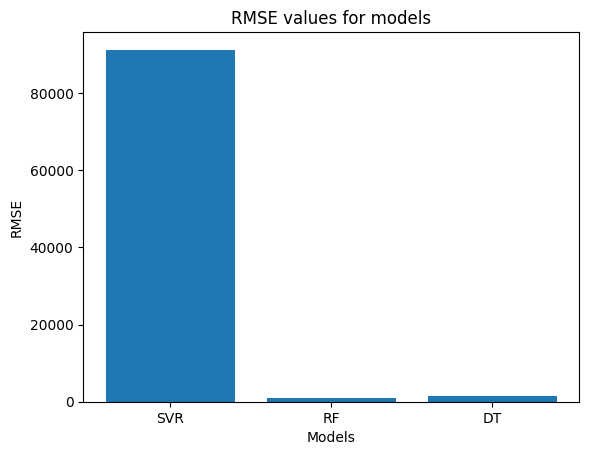

In [90]:
# Values of the MSE
RMSE = [rmse_svr, rmse_rf, rmse_dt]

# Create a bar chart
plt.bar(Models, MSE)

# Add labels and a title
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE values for models")

# Show the plot
plt.show()

# Best Model

- random forest with n_estimators = 500 is the best model in the dataset.

# Prediction

In [95]:
X_test

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code
107630,4,3.0,20,134,8,14,82
118238,5,1.0,10,56,8,4,40
45121,1,4.0,39,53,3,11,117
20587,0,4.0,28,26,8,4,37
71125,3,1.0,13,89,4,16,135
...,...,...,...,...,...,...,...
32303,1,2.0,29,79,9,22,131
74253,3,1.0,37,113,7,18,16
128225,5,2.0,41,54,3,11,140
36930,1,3.0,20,125,7,13,29


In [96]:
X_test.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code
107630,4,3.0,20,134,8,14,82
118238,5,1.0,10,56,8,4,40
45121,1,4.0,39,53,3,11,117
20587,0,4.0,28,26,8,4,37
71125,3,1.0,13,89,4,16,135


In [97]:
model_rf.predict([[7, 1.0, 13, 26, 3, 4, 1]])

/Users/olamidefasugba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([28.182])